## Классификация

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from scipy.stats import norm
%matplotlib inline

Text(0, 0.5, 'Плотность вероятности')

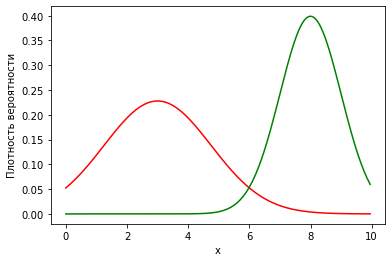

In [2]:
x=np.arange(0, 10, 0.05)
negative=norm.pdf(x, loc=3, scale=1.75)
positive=norm.pdf(x, loc=8, scale=1)
plt.plot(x, negative, color='r')
plt.plot(x, positive, color='g')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')

## Логистическая регрессия

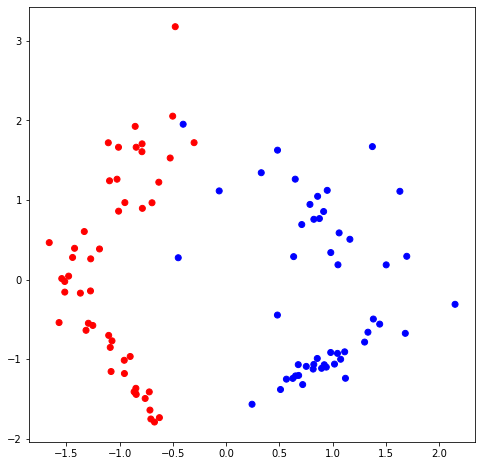

In [3]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)
# datasets.make_blobs(centers = 2, cluster_std = 1.5, random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

In [4]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


#### В виде класса

In [5]:
class logistic_regression:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations=1000
        self.eta=eta
    def _log_grad(self, X, target):
        m = X.shape[0]
        y=(2*target-1)
        score=np.dot(X, self.w.T).flatten()+self.w0
        Z=-y/(m*(1+np.exp(y*score)))
        grad=Z[np.newaxis, :].dot(X)
        return grad/m, np.sum(Z)/m
    def _optimize(self, X, target):
        for i in range(self.n_iterations):        
            grad_w, grad_w0 = self._log_grad(X, target)
            self.w = self.w-self.eta * grad_w
            self.w0 = self.w0 - self.eta * grad_w0
    def fit(self, X, target):
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        self._optimize(X, target)
    def predict_proba(self, X):  
        '''
        Рассчёт вероятности
        '''
        score=X.dot(self.w.T).flatten()+self.w0
        return 1/(1+np.exp(-score))
    def predict(self, X, thr=0.5):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool) 
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted

In [6]:
mod=logistic_regression()
mod.fit(X_train, y_train)
y_predicted_test = mod.predict(X_test)
y_predicted_train = mod.predict(X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {mod.w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[0.32398168 0.01226158]]
Точность на обучающей выборке: 97.143
Точность на тестовой выборке: 96.667


## Матрица ошибок

In [7]:
def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

In [8]:
cofusion_fixed=confusion(mod.predict(X_test), y_test)
sensitivity=cofusion_fixed['TP']/(cofusion_fixed['TP']+cofusion_fixed['FN'])
specificity=cofusion_fixed['TN']/(cofusion_fixed['TN']+cofusion_fixed['FP'])
balanced_accuracy=(sensitivity+specificity)/2
print(f"Для порога по вероятности 0.5 на тестовой выборке имеем: чувствительность {sensitivity},"+
      f"специфичность {specificity}, сбалансированную точность {balanced_accuracy}")

Для порога по вероятности 0.5 на тестовой выборке имеем: чувствительность 0.9375,специфичность 1.0, сбалансированную точность 0.96875


In [9]:
precision=cofusion_fixed['TP']/(cofusion_fixed['TP']+cofusion_fixed['FP'])
recall=sensitivity
f1_score=2*precision*recall/(precision+recall)
print(f"Для порога по вероятности 0.5 на тестовой выборке имеем: точность {precision},"+
      f"полноту {recall}, f1-скор {f1_score}")

Для порога по вероятности 0.5 на тестовой выборке имеем: точность 1.0,полноту 0.9375, f1-скор 0.967741935483871


## ДОМАШНЕЕ ЗАДАНИЕ

<b>Домашнее задание:</b> Определите AUC_ROC и AUC_PR для модели         логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности.<br>
<i>Дополнительное задание(не обязательно):</i> Получите такие же характеристики для линейной регрессии и сравните две модели.

In [10]:
proba=np.unique(mod.predict_proba(X_test))

In [11]:
for p in proba:
    print("Для порога по вероятности {0} на тестовой выборке имеем:".format(p)+
      f" {confusion(mod.predict(X_test, p), y_test)}")
    

Для порога по вероятности 0.37576183889983183 на тестовой выборке имеем: {'TP': 16, 'FP': 13, 'FN': 0, 'TN': 1}
Для порога по вероятности 0.37743531819847453 на тестовой выборке имеем: {'TP': 16, 'FP': 12, 'FN': 0, 'TN': 2}
Для порога по вероятности 0.38605073396047773 на тестовой выборке имеем: {'TP': 16, 'FP': 11, 'FN': 0, 'TN': 3}
Для порога по вероятности 0.3932982404221594 на тестовой выборке имеем: {'TP': 16, 'FP': 10, 'FN': 0, 'TN': 4}
Для порога по вероятности 0.3960311448763592 на тестовой выборке имеем: {'TP': 16, 'FP': 9, 'FN': 0, 'TN': 5}
Для порога по вероятности 0.4219700922749085 на тестовой выборке имеем: {'TP': 16, 'FP': 8, 'FN': 0, 'TN': 6}
Для порога по вероятности 0.4258110607284189 на тестовой выборке имеем: {'TP': 16, 'FP': 7, 'FN': 0, 'TN': 7}
Для порога по вероятности 0.4351868598210908 на тестовой выборке имеем: {'TP': 16, 'FP': 6, 'FN': 0, 'TN': 8}
Для порога по вероятности 0.43566683838569675 на тестовой выборке имеем: {'TP': 16, 'FP': 5, 'FN': 0, 'TN': 9}
Дл

In [12]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1])

In [13]:
x = np.array([x[0] for x in X_test])
target = y_test


In [14]:
order=np.argsort(x)
target=target[order]
x=x[order]

In [15]:
bins_pos=target
bins_neg=1-target
num_pos, num_neg=np.sum(bins_pos), np.sum(bins_neg)
print(f'{num_pos} объектов положительного класса, {num_neg} объектов негативного класса')

16 объектов положительного класса, 14 объектов негативного класса


In [16]:
bins_pos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
num_pos

16

In [18]:
TPR=np.concatenate([[0], np.cumsum(bins_neg)/num_neg])
#TPR=np.concatenate([np.cumsum(bins_pos)/num_pos, [1]])
TPR

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 0.92857143,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [19]:
FPR=np.concatenate([[0], np.cumsum(bins_pos)/num_pos])
#FPR=np.concatenate([np.cumsum(bins_neg)/num_neg, [1]])
FPR

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0625, 0.0625,
       0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375, 0.5   , 0.5625,
       0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375, 1.    ])

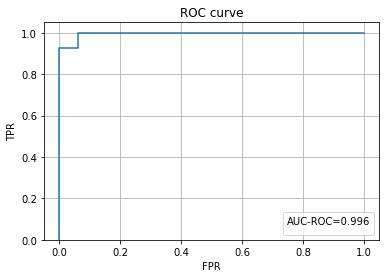

In [20]:
AUC_ROC = np.sum((FPR[1:]-FPR[:-1])*(TPR[1:]+TPR[:-1])/2)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR, TPR)

In [21]:
precision=np.cumsum(bins_neg)/(np.cumsum(bins_neg)+np.cumsum(bins_pos))
precision

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.92857143, 0.93333333,
       0.875     , 0.82352941, 0.77777778, 0.73684211, 0.7       ,
       0.66666667, 0.63636364, 0.60869565, 0.58333333, 0.56      ,
       0.53846154, 0.51851852, 0.5       , 0.48275862, 0.46666667])

In [22]:
recall = TPR
recall

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 0.92857143,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

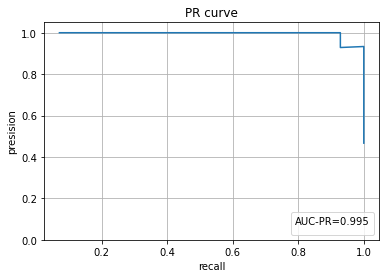

In [23]:
AUC_PR = np.sum(precision*(recall[1:]-recall[:-1]))

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall[1:], precision)

**РУЧНОЙ РАСЧЁТ**

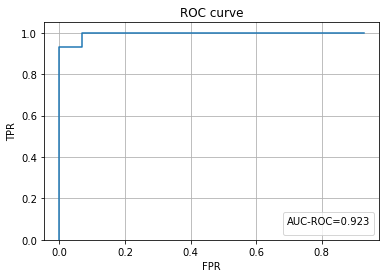

In [24]:
from numpy import trapz  # используем эту функцию для расчета площади под кривой

FPR_manual = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0.07,0.142,0.214,0.285,0.357,0.42,0.5,0.57,0.64,0.71,0.78,0.85,0.928]
TPR_manual = [0,0.0625,0.126,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.56,0.625,0.6875,0.75,0.8125,0.875,0.93,0.93,1,1,1,1,1,1,1,1,1,1,1,1,1]

AUC_ROC = trapz(TPR_manual, x = FPR_manual, dx=0.1)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR_manual, TPR_manual)

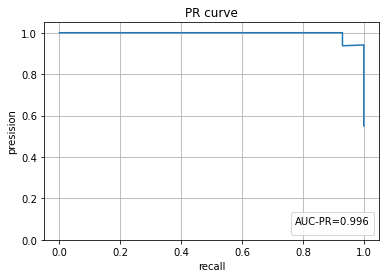

In [25]:
#precision_manual = [0.55,0.57,0.59,0.61,0.64,0.66,0.69,0.72,0.76,0.8,0.84,0.88,0.941,0.937,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
recall_manual = [0,0.0625,0.126,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.56,0.625,0.6875,0.75,0.8125,0.875,0.93,0.93,1,1,1,1,1,1,1,1,1,1,1,1,1]
precision_manual = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.937,0.941,0.88,0.84,0.8,0.76,0.72,0.69,0.66,0.64,0.61,0.59,0.57,0.55]


AUC_PR = trapz(precision_manual, x = recall_manual, dx=0.1)

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision') #логарифмической функцией потерь (log loss)
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall_manual, precision_manual)